# PARTIE 3 : VISUALISATION GÉOGRAPHIQUE - S&P 500

Analyse géographique des sièges sociaux des entreprises du S&P 500

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set3")
%matplotlib inline

In [2]:
sp500_symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "BRK.B", "JNJ", "V",
    "WMT", "JPM", "PG", "MA", "UNH", "HD", "DIS", "CRM", "MCD", "KO",
    "NFLX", "CSCO", "PEP", "ABT", "ABBV", "MMM", "XOM", "CVX", "BA", "COST",
    "AMD", "INTC", "QCOM", "PYPL", "TXN", "ADBE", "IBM", "AVGO", "ACN", "GILD",
    "CDNS", "MRVL", "OKTA", "CCI", "ANET", "SNPS", "ASML", "NOW", "PANW", "LRCX"
]

sector_info = pd.DataFrame({
    'symbol': ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "BRK.B", "JNJ", "V",
               "WMT", "JPM", "PG", "MA", "UNH", "HD", "DIS", "CRM", "MCD", "KO",
               "NFLX", "CSCO", "PEP", "ABT", "ABBV", "MMM", "XOM", "CVX", "BA", "COST",
               "AMD", "INTC", "QCOM", "PYPL", "TXN", "ADBE", "IBM", "AVGO", "ACN", "GILD",
               "CDNS", "MRVL", "OKTA", "CCI", "ANET", "SNPS", "ASML", "NOW", "PANW", "LRCX"],
    'sector': ["Technology", "Technology", "Technology", "Consumer", "Technology", "Technology", "Consumer", "Finance", "Healthcare", "Finance",
               "Consumer", "Finance", "Consumer", "Finance", "Healthcare", "Consumer", "Consumer", "Technology", "Consumer", "Consumer",
               "Technology", "Technology", "Consumer", "Healthcare", "Healthcare", "Industrial", "Energy", "Energy", "Industrial", "Consumer",
               "Technology", "Technology", "Technology", "Finance", "Technology", "Technology", "Technology", "Technology", "Technology", "Healthcare",
               "Technology", "Technology", "Technology", "Real Estate", "Technology", "Technology", "Technology", "Technology", "Technology", "Technology"]
})

# Informations de localisation des sièges sociaux (États USA)
location_info = pd.DataFrame({
    'symbol': ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "BRK.B", "JNJ", "V",
               "WMT", "JPM", "PG", "MA", "UNH", "HD", "DIS", "CRM", "MCD", "KO",
               "NFLX", "CSCO", "PEP", "ABT", "ABBV", "MMM", "XOM", "CVX", "BA", "COST",
               "AMD", "INTC", "QCOM", "PYPL", "TXN", "ADBE", "IBM", "AVGO", "ACN", "GILD",
               "CDNS", "MRVL", "OKTA", "CCI", "ANET", "SNPS", "ASML", "NOW", "PANW", "LRCX"],
    'state': ["CA", "WA", "CA", "WA", "CA", "CA", "TX", "NE", "NJ", "CA",
              "AR", "NY", "OH", "NY", "MN", "GA", "FL", "CA", "IL", "GA",
              "CA", "CA", "NY", "NJ", "IL", "MN", "TX", "TX", "WA", "WA",
              "CA", "CA", "CA", "CA", "TX", "CA", "NY", "CA", "TX", "NJ",
              "CA", "CA", "CA", "MA", "CA", "CA", "CA", "CA", "CA", "CA"],
    'lat': [37.33, 47.61, 37.42, 47.61, 37.49, 37.48, 30.27, 41.14, 40.37, 37.57,
            34.74, 40.71, 39.96, 40.76, 44.98, 33.75, 28.43, 37.79, 41.88, 33.75,
            37.77, 37.39, 42.66, 40.37, 42.68, 46.73, 29.76, 29.76, 47.61, 47.61,
            37.49, 47.61, 37.57, 37.77, 30.27, 37.79, 40.75, 37.49, 40.37, 40.37,
            37.77, 37.49, 37.75, 42.28, 37.75, 37.75, 37.49, 37.97, 37.49, 37.49],
    'lon': [-122.03, -122.33, -122.08, -122.33, -122.19, -122.15, -97.74, -95.68, -74.06, -122.27,
            -92.28, -74.01, -84.27, -73.97, -93.28, -84.39, -81.38, -122.27, -87.63, -84.27,
            -122.27, -122.27, -71.06, -74.06, -93.30, -93.30, -95.38, -95.38, -122.33, -122.33,
            -122.19, -122.33, -122.27, -122.27, -97.74, -122.27, -73.98, -122.19, -74.06, -74.06,
            -122.27, -122.19, -122.27, -71.06, -122.27, -122.27, -122.19, -122.27, -122.19, -122.19]
})

In [3]:
# Récupérer les données
print("Récupération des données S&P 500...")
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Télécharger les données
sp500_data_list = []
for symbol in sp500_symbols:
    try:
        data = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if not data.empty:  # Vérifier que des données ont été récupérées
            # Aplatir les colonnes si MultiIndex
            if isinstance(data.columns, pd.MultiIndex):
                data.columns = data.columns.get_level_values(0)
            data = data.reset_index()
            data['symbol'] = symbol
            sp500_data_list.append(data)
        else:
            print(f"Aucune donnée pour {symbol}")
    except Exception as e:
        print(f"Erreur pour {symbol}: {e}")

# Concaténer les données verticalement
sp500_data = pd.concat(sp500_data_list, axis=0, ignore_index=True)

# Standardiser les noms de colonnes
sp500_data.columns = sp500_data.columns.str.lower().str.replace(' ', '_')

# Joindre les secteurs et localisations
sp500_data = sp500_data.merge(sector_info, on='symbol', how='left')
sp500_data = sp500_data.merge(location_info, on='symbol', how='left')

print(f"Données chargées: {len(sp500_data)} lignes")
print(f"Actions récupérées: {sp500_data['symbol'].nunique()}")

Récupération des données S&P 500...


$BRK.B: possibly delisted; no timezone found

1 Failed download:
['BRK.B']: possibly delisted; no timezone found


Aucune donnée pour BRK.B
Données chargées: 12250 lignes
Actions récupérées: 49


## GRAPHIQUE 1 : Distribution des stocks par état (États-Unis)

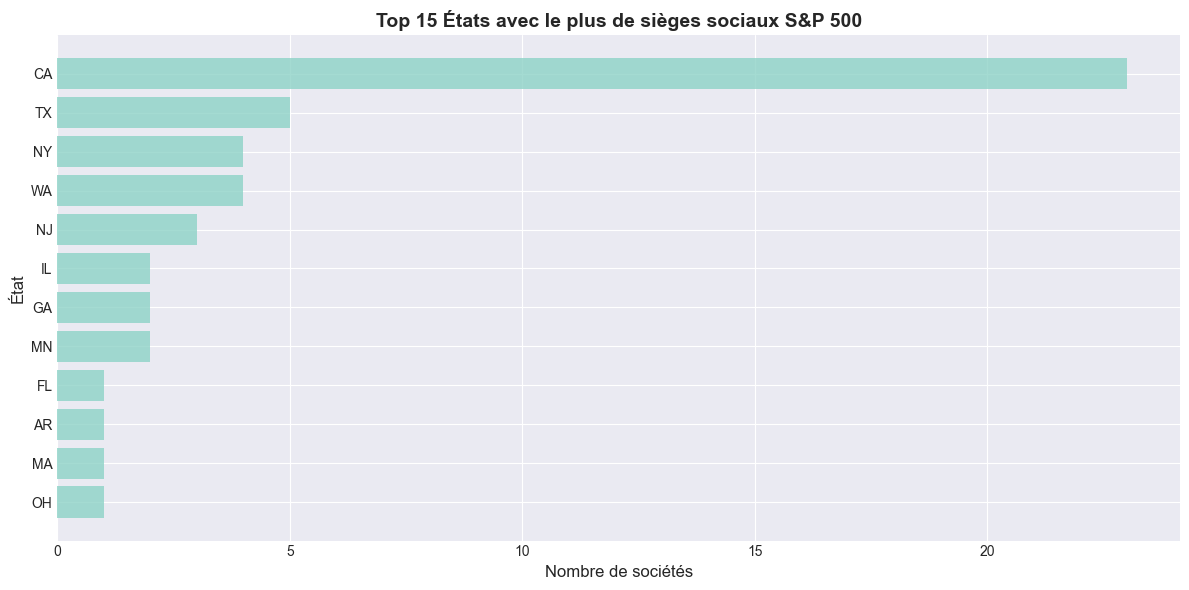

In [4]:
latest_prices = sp500_data.sort_values('date').groupby('symbol').tail(1)

state_distribution = latest_prices.groupby('state').agg(
    count=('symbol', 'count'),
    avg_price=('close', 'mean')
).reset_index().sort_values('count', ascending=False)

plt.figure(figsize=(12, 6))
top_15_states = state_distribution.head(15)
plt.barh(top_15_states['state'], top_15_states['count'], alpha=0.8)
plt.xlabel('Nombre de sociétés', fontsize=12)
plt.ylabel('État', fontsize=12)
plt.title('Top 15 États avec le plus de sièges sociaux S&P 500', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## GRAPHIQUE 2 : Prix moyen par état

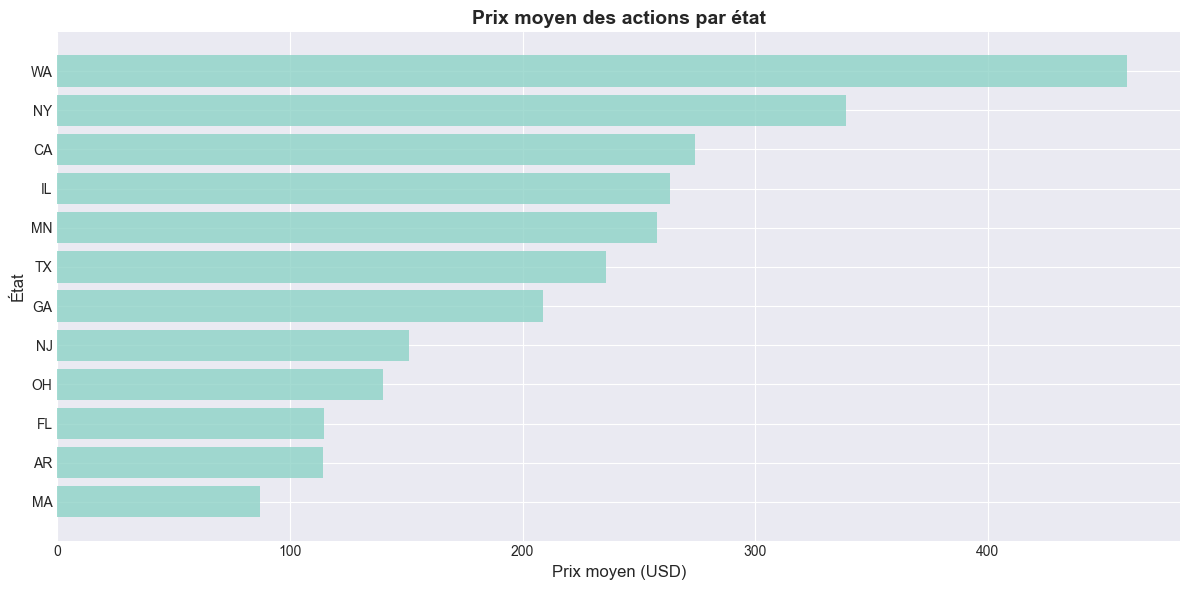

In [5]:
plt.figure(figsize=(12, 6))
top_15_states_price = state_distribution.head(15).sort_values('avg_price', ascending=True)
plt.barh(top_15_states_price['state'], top_15_states_price['avg_price'], alpha=0.8)
plt.xlabel('Prix moyen (USD)', fontsize=12)
plt.ylabel('État', fontsize=12)
plt.title('Prix moyen des actions par état', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## GRAPHIQUE 3 : Scatter géographique (lat/lon)

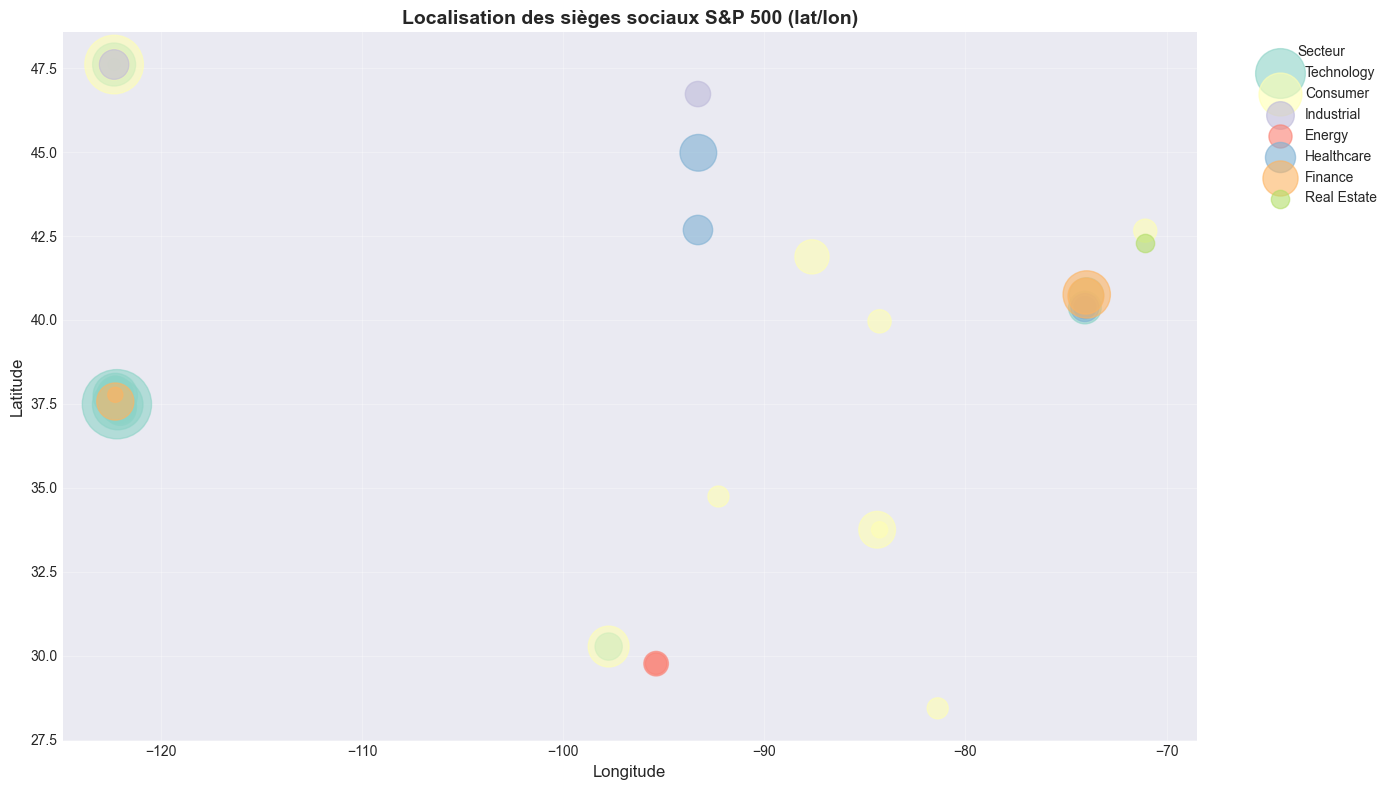

In [6]:
latest_unique = latest_prices.drop_duplicates(subset=['symbol'])

plt.figure(figsize=(14, 8))
sectors = latest_unique['sector'].unique()
colors = plt.cm.Set3(range(len(sectors)))
sector_colors = dict(zip(sectors, colors))

for sector in sectors:
    sector_data = latest_unique[latest_unique['sector'] == sector]
    plt.scatter(sector_data['lon'], sector_data['lat'], 
                s=sector_data['close']*2, 
                alpha=0.6, 
                color=sector_colors[sector],
                label=sector)

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Localisation des sièges sociaux S&P 500 (lat/lon)', fontsize=14, fontweight='bold')
plt.legend(title='Secteur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## GRAPHIQUE 4 : Heatmap secteur par état

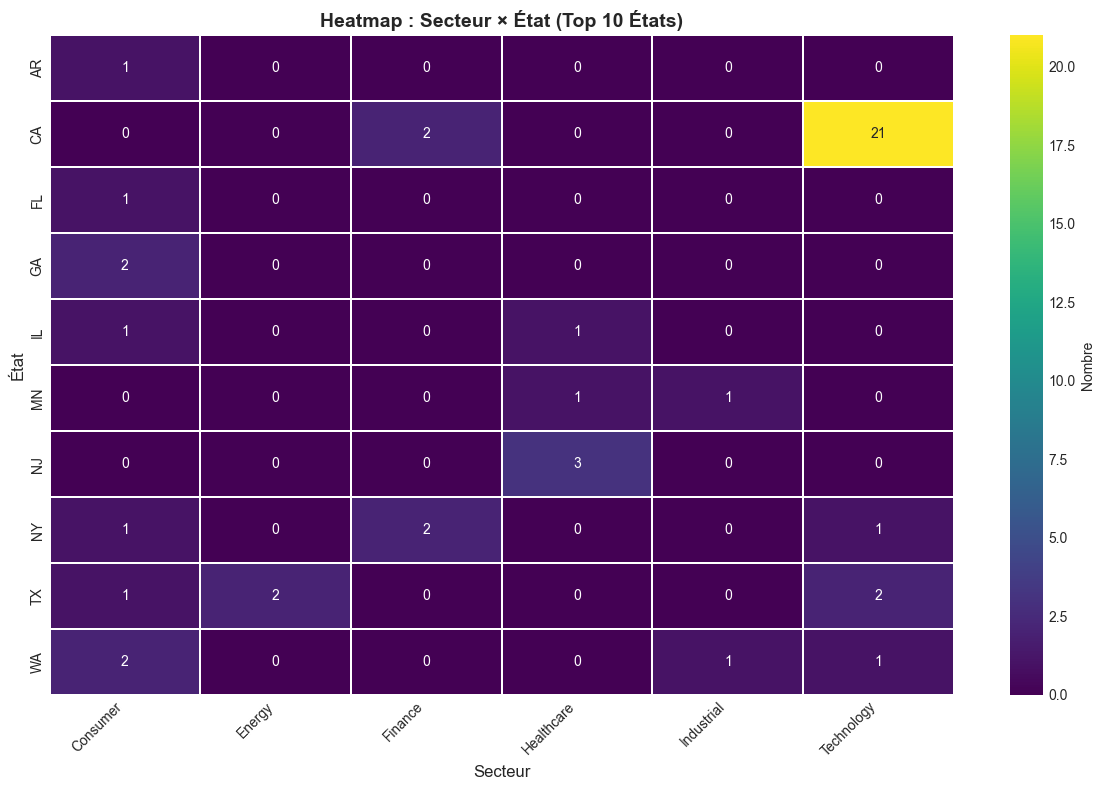

In [7]:
sector_state = latest_prices.groupby(['state', 'sector']).size().reset_index(name='count')
sector_state = sector_state[sector_state['state'].notna() & sector_state['sector'].notna()]

# Top 10 états
top_10_states = latest_prices.groupby('state').size().nlargest(10).index
sector_state_filtered = sector_state[sector_state['state'].isin(top_10_states)]

pivot_sector_state = sector_state_filtered.pivot(index='state', columns='sector', values='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sector_state, annot=True, fmt='.0f', cmap='viridis', 
            cbar_kws={'label': 'Nombre'}, linewidths=0.3, linecolor='white')
plt.title('Heatmap : Secteur × État (Top 10 États)', fontsize=14, fontweight='bold')
plt.xlabel('Secteur', fontsize=12)
plt.ylabel('État', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## GRAPHIQUE 5 : CARTE USA avec nombre de sociétés par état

In [8]:
# Mapping des codes d'état vers les noms complets
state_mapping = {
    'CA': 'California', 'WA': 'Washington', 'NY': 'New York', 'TX': 'Texas',
    'NJ': 'New Jersey', 'OH': 'Ohio', 'IL': 'Illinois', 'GA': 'Georgia',
    'FL': 'Florida', 'MN': 'Minnesota', 'AR': 'Arkansas', 'NE': 'Nebraska',
    'MA': 'Massachusetts'
}

state_counts = latest_prices.groupby('state').agg(
    count=('symbol', 'count'),
    avg_price=('close', 'mean')
).reset_index()
state_counts['state_name'] = state_counts['state'].map(state_mapping)

# Utiliser plotly pour créer une carte USA
fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    hover_name='state_name',
    hover_data={'count': True, 'avg_price': ':.2f', 'state': False},
    color_continuous_scale='Reds',
    scope='usa',
    title='Carte USA : Nombre de sièges sociaux S&P 500 par État',
    labels={'count': 'Nombre de sociétés'}
)

fig.update_layout(
    geo=dict(
        bgcolor='rgba(0,0,0,0)',
        lakecolor='lightblue',
        landcolor='white'
    ),
    title_font_size=16
)

fig.show()

print("\n✓ Partie 3 complétée : Visualisation géographique avec carte USA")


✓ Partie 3 complétée : Visualisation géographique avec carte USA
